In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
data=pd.read_csv('/content/qsar_fish_toxicity.csv',sep=";")
data

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390
...,...,...,...,...,...,...,...
903,2.801,0.728,2.226,0,2,0.736,3.109
904,3.652,0.872,0.867,2,3,3.983,4.040
905,3.763,0.916,0.878,0,6,2.918,4.818
906,2.831,1.393,1.077,0,1,0.906,5.317


In [ ]:
x= data.iloc[:,:-1]
y=data['LC50']

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam,SGD

In [ ]:
X_train_full.shape

(635, 6)

In [ ]:
hidden_units1 = 10
hidden_units2 = 10
hidden_units3 = 10
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu',input_dim=6),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()
print(model)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                70        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# loss function
mse = MeanSquaredError()
model.compile(
    loss=mse, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[mse]
)
# train the model
history = model.fit(
    X_train_full, 
    y_train_full.values, 
    epochs=100, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/100
8/8 [==============================] - 3s 122ms/step - loss: 18.0689 - mean_squared_error: 18.0486 - val_loss: 17.6982 - val_mean_squared_error: 17.6973
Epoch 2/100
8/8 [==============================] - 0s 11ms/step - loss: 15.3853 - mean_squared_error: 15.3709 - val_loss: 12.2428 - val_mean_squared_error: 12.2419
Epoch 3/100
8/8 [==============================] - 0s 16ms/step - loss: 6.8231 - mean_squared_error: 6.7992 - val_loss: 1.4254 - val_mean_squared_error: 1.4234
Epoch 4/100
8/8 [==============================] - 0s 15ms/step - loss: 2.8651 - mean_squared_error: 2.8605 - val_loss: 1.9767 - val_mean_squared_error: 1.9742
Epoch 5/100
8/8 [==============================] - 0s 26ms/step - loss: 1.6581 - mean_squared_error: 1.6616 - val_loss: 2.1012 - val_mean_squared_error: 2.0999
Epoch 6/100
8/8 [==============================] - 0s 23ms/step - loss: 1.7407 - mean_squared_error: 1.7336 - val_loss: 1.2307 - val_mean_squared_error: 1.2293
Epoch 7/100
8/8 [==============

In [ ]:
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 5ms/step - loss: 0.9347 - mean_squared_error: 0.9013


[0.9346744418144226, 0.901275634765625]

In [ ]:
pd.DataFrame(history.history)

,loss,mean_squared_error,val_loss,val_mean_squared_error
0,18.068876,18.048632,17.698154,17.697281
1,15.385293,15.370893,12.242814,12.241856
2,6.823082,6.799212,1.425374,1.423391
3,2.865134,2.860529,1.976655,1.974150
4,1.658115,1.661557,2.101177,2.099913
...,...,...,...,...
95,0.892143,0.895186,0.899628,0.900574
96,0.895671,0.895926,0.895675,0.896607
97,0.904404,0.902358,0.911430,0.912387
98,0.907576,0.908868,0.936643,0.937473


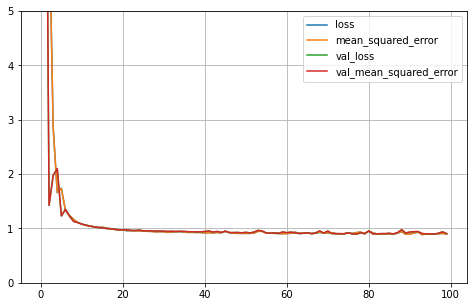

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 5)
plt.show()

In [ ]:
import time
import os

def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path


In [ ]:
UNIQUE_PATH = model.save(saveModel_path())

your model will be saved at the following location
SAVED_MODELS/Model_2022_02_08_11_17_41_.h5


In [ ]:
loaded_model = tf.keras.models.load_model("SAVED_MODELS/Model_2022_02_08_11_17_41_.h5", compile=False)

In [ ]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                70        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loaded_model.predict([[3.260,	0.829,	1.676,	0	,1	,1.453]])

array([[3.7895837]], dtype=float32)